In [1]:
#Think about scaling

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
# Get CSV file
zoo = pd.read_csv(os.path.join('Resources', 'zoo.csv'))
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
0,Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
2,Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
3,Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
4,Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
208,Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
209,Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate
210,Wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,Bird


In [4]:
zoo_df=zoo.set_index('animal_name')
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
animal_name,,,,,,,,,,,,,,,,,,
Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


In [5]:
# Data for predictions
kangaroo = np.array([[1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1]])
bald_eagle = np.array([[0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0]])
rattle_snake = np.array([[0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,]])
goldfish = np.array([[0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0]])
mountain_chicken_frog = np.array([[0,0,1,0,0,1,1,0,1,1,0,0,4,0,0,0]])
vampire_moth = np.array([[0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0]])
coral = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])
sea_turtle = np.array([[0,0,1,0,0,1,1,0,1,0,0,1,4,1,0,1]])

In [6]:
# Assign X and y
X = zoo_df.drop(["class_type","class"], axis=1)
y = zoo_df["class_type"]
y_name = zoo_df["class"]
print (X.shape, y.shape)

(212, 16) (212,)


In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [9]:
print(f"Training score: {classifier.score(X_train, y_train)}")
print(f"Testing score: {classifier.score(X_test, y_test)}")

Training score: 0.9748427672955975
Testing score: 0.9245283018867925


In [10]:
print(f"Predictions")
print(f"Kangaroo: {classifier.predict(kangaroo)}")
print(f"Bald Eagle: {classifier.predict(bald_eagle)}")
print(f"Rattle Snake: {classifier.predict(rattle_snake)}")
print(f"Goldfish: {classifier.predict(goldfish)}")
print(f"Mountain Chicken Frog: {classifier.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {classifier.predict(vampire_moth)}")
print(f"Coral: {classifier.predict(coral)}")
print(f"Sea Turtle: {classifier.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [11]:
predictions = classifier.predict(X_test)
class_predictions_table = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
class_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [12]:
importances = classifier.coef_
importances

array([[ 1.35378702, -0.25009522, -1.56623843,  1.86200699, -0.14008483,
        -0.2705826 ,  0.15191743,  0.49857978,  0.26122461,  0.28997284,
        -0.29794013,  0.3006316 ,  0.03679915,  0.29801119,  0.01367921,
         0.56147282],
       [-0.20853878,  2.13323785,  0.1828647 , -0.19698364,  1.08506701,
        -0.36691765,  0.07129533, -0.98450926,  0.56853319,  0.33950751,
        -0.27903875, -0.30812747, -0.256556  ,  0.483027  , -0.07766078,
         0.3192429 ],
       [-0.73692766, -0.96200139,  0.29438269, -0.77608936, -0.62236396,
        -0.63033193,  0.60258984,  0.82520648,  0.57510229,  0.35946648,
         0.46572497, -1.02003992, -0.05207132,  1.31363854,  0.3649043 ,
         0.2744398 ],
       [-0.05296304, -0.17278354,  0.6258549 , -0.36671083, -0.11961923,
         0.70629466, -0.16908961,  0.29705584,  0.42459817, -1.15405342,
        -0.26390915,  1.5676038 , -0.91435148,  0.49967544,  0.02284487,
         0.16942707],
       [-0.34005002, -0.29635051,  0

### Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9874213836477987

In [14]:
print(f"Training score: {rf.score(X_train, y_train)}")
print(f"Testing score: {rf.score(X_test, y_test)}")

Training score: 0.9874213836477987
Testing score: 0.9622641509433962


In [15]:
print(f"Predictions")
print(f"Kangaroo: {rf.predict(kangaroo)}")
print(f"Bald Eagle: {rf.predict(bald_eagle)}")
print(f"Rattle Snake: {rf.predict(rattle_snake)}")
print(f"Goldfish: {rf.predict(goldfish)}")
print(f"Mountain Chicken Frog: {rf.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {rf.predict(vampire_moth)}")
print(f"Coral: {rf.predict(coral)}")
print(f"Sea Turtle: {rf.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [16]:
predictions = rf.predict(X_test)
rf_predictions_table = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
rf_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [17]:
importances = rf.feature_importances_
importances

array([0.0516607 , 0.13717002, 0.09895423, 0.11559507, 0.05142706,
       0.04837058, 0.01666169, 0.04451234, 0.08172611, 0.06786773,
       0.01434536, 0.08463976, 0.1019632 , 0.06465581, 0.00425968,
       0.01619065])

### K Nearest Neighbor

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.987/0.962
k: 3, Train/Test Score: 0.956/0.943
k: 5, Train/Test Score: 0.962/0.943
k: 7, Train/Test Score: 0.918/0.925
k: 9, Train/Test Score: 0.912/0.887
k: 11, Train/Test Score: 0.918/0.887
k: 13, Train/Test Score: 0.906/0.887
k: 15, Train/Test Score: 0.899/0.849
k: 17, Train/Test Score: 0.899/0.849
k: 19, Train/Test Score: 0.836/0.830


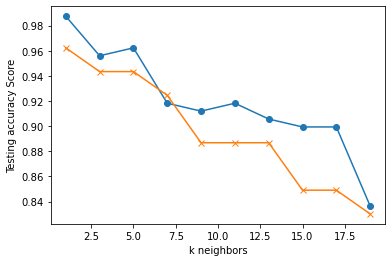

In [19]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Train Acc: 0.918
k=11 Test Acc: 0.887


In [21]:
print(f"Predictions")
print(f"Kangaroo: {knn.predict(kangaroo)}")
print(f"Bald Eagle: {knn.predict(bald_eagle)}")
print(f"Rattle Snake: {knn.predict(rattle_snake)}")
print(f"Goldfish: {knn.predict(goldfish)}")
print(f"Mountain Chicken Frog: {knn.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {knn.predict(vampire_moth)}")
print(f"Coral: {knn.predict(coral)}")
print(f"Sea Turtle: {knn.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [22]:
predictionsknn = knn.predict(X_test)
knn_predictions_table = pd.DataFrame({"Prediction": predictionsknn, "Actual": y_test})
knn_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [23]:
#Importances
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionsknn))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           5       0.50      1.00      0.67         3
           6       0.75      1.00      0.86         6
           7       1.00      0.50      0.67         6

    accuracy                           0.89        53
   macro avg       0.87      0.85      0.82        53
weighted avg       0.93      0.89      0.88        53



### Support Vector Machine

In [24]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

print('Train Acc: %.3f' % svm_model.score(X_train, y_train))
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

Train Acc: 0.981
Test Acc: 0.943


In [25]:
predictionssvm = svm_model.predict(X_test)
print(classification_report(y_test, predictionssvm,
                            target_names=["1","2","3","4","5","6","7"]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



In [26]:
#Train the parameters? Do we want to do this?
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.906, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.906, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.938, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=1.000, total=   0.0s
[CV] 

[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.969, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.875, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.969, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.968, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_score_)


{'C': 1, 'gamma': 0.0001}
0.9495967741935484


In [28]:
print(f"Predictions")
print(f"Kangaroo: {grid.predict(kangaroo)}")
print(f"Bald Eagle: {grid.predict(bald_eagle)}")
print(f"Rattle Snake: {grid.predict(rattle_snake)}")
print(f"Goldfish: {grid.predict(goldfish)}")
print(f"Mountain Chicken Frog: {grid.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {grid.predict(vampire_moth)}")
print(f"Coral: {grid.predict(coral)}")
print(f"Sea Turtle: {grid.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [29]:
svm_predictions_table = pd.DataFrame({"Prediction": predictionssvm, "Actual": y_test})
svm_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


### Neural network

In [30]:
# y = y.reshape(-1, 1)

print(X.shape)
print(y_name.shape)

(212, 16)
(212,)


In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_name, random_state=1)

In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train2)
X_train2_scaled = X_scaler.transform(X_train2)
X_test2_scaled = X_scaler.transform(X_test2)

In [33]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_name)
encoded_y_train = label_encoder.transform(y_train2)
encoded_y_test= label_encoder.transform(y_test2)

In [34]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train2_categorical = to_categorical(encoded_y_train)
y_test2_categorical = to_categorical(encoded_y_test)
y_train2_categorical[0]


array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [35]:
from tensorflow.keras.models import Sequential

nn_model = Sequential()

In [36]:
#Add first layer
from tensorflow.keras.layers import Dense
nn_model.add(Dense(units=4,activation='relu', input_dim=16))

In [37]:
#Add output layer
nn_model.add(Dense(units=7, activation='softmax'))

In [38]:
#Compile the model
nn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 68        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 35        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fit (train) the model
nn_model.fit(
    X_train2_scaled,
    y_train2_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)


Train on 159 samples
Epoch 1/1000
159/159 - 1s - loss: 2.3686 - accuracy: 0.0314
Epoch 2/1000
159/159 - 0s - loss: 2.3350 - accuracy: 0.0377
Epoch 3/1000
159/159 - 0s - loss: 2.2990 - accuracy: 0.0629
Epoch 4/1000
159/159 - 0s - loss: 2.2674 - accuracy: 0.0881
Epoch 5/1000
159/159 - 0s - loss: 2.2349 - accuracy: 0.0881
Epoch 6/1000
159/159 - 0s - loss: 2.2048 - accuracy: 0.0881
Epoch 7/1000
159/159 - 0s - loss: 2.1773 - accuracy: 0.0881
Epoch 8/1000
159/159 - 0s - loss: 2.1495 - accuracy: 0.0943
Epoch 9/1000
159/159 - 0s - loss: 2.1242 - accuracy: 0.0943
Epoch 10/1000
159/159 - 0s - loss: 2.0994 - accuracy: 0.0943
Epoch 11/1000
159/159 - 0s - loss: 2.0763 - accuracy: 0.1195
Epoch 12/1000
159/159 - 0s - loss: 2.0525 - accuracy: 0.1195
Epoch 13/1000
159/159 - 0s - loss: 2.0298 - accuracy: 0.1195
Epoch 14/1000
159/159 - 0s - loss: 2.0079 - accuracy: 0.1384
Epoch 15/1000
159/159 - 0s - loss: 1.9878 - accuracy: 0.1635
Epoch 16/1000
159/159 - 0s - loss: 1.9687 - accuracy: 0.1887
Epoch 17/100

Epoch 135/1000
159/159 - 0s - loss: 0.7141 - accuracy: 0.8616
Epoch 136/1000
159/159 - 0s - loss: 0.7094 - accuracy: 0.8616
Epoch 137/1000
159/159 - 0s - loss: 0.7049 - accuracy: 0.8616
Epoch 138/1000
159/159 - 0s - loss: 0.7004 - accuracy: 0.8616
Epoch 139/1000
159/159 - 0s - loss: 0.6959 - accuracy: 0.8679
Epoch 140/1000
159/159 - 0s - loss: 0.6916 - accuracy: 0.8679
Epoch 141/1000
159/159 - 0s - loss: 0.6872 - accuracy: 0.8679
Epoch 142/1000
159/159 - 0s - loss: 0.6830 - accuracy: 0.8679
Epoch 143/1000
159/159 - 0s - loss: 0.6786 - accuracy: 0.8679
Epoch 144/1000
159/159 - 0s - loss: 0.6748 - accuracy: 0.8742
Epoch 145/1000
159/159 - 0s - loss: 0.6703 - accuracy: 0.8742
Epoch 146/1000
159/159 - 0s - loss: 0.6662 - accuracy: 0.8742
Epoch 147/1000
159/159 - 0s - loss: 0.6622 - accuracy: 0.8805
Epoch 148/1000
159/159 - 0s - loss: 0.6581 - accuracy: 0.8805
Epoch 149/1000
159/159 - 0s - loss: 0.6541 - accuracy: 0.8805
Epoch 150/1000
159/159 - 0s - loss: 0.6500 - accuracy: 0.8805
Epoch 15

159/159 - 0s - loss: 0.3252 - accuracy: 0.9686
Epoch 268/1000
159/159 - 0s - loss: 0.3235 - accuracy: 0.9686
Epoch 269/1000
159/159 - 0s - loss: 0.3219 - accuracy: 0.9686
Epoch 270/1000
159/159 - 0s - loss: 0.3203 - accuracy: 0.9686
Epoch 271/1000
159/159 - 0s - loss: 0.3188 - accuracy: 0.9686
Epoch 272/1000
159/159 - 0s - loss: 0.3172 - accuracy: 0.9686
Epoch 273/1000
159/159 - 0s - loss: 0.3156 - accuracy: 0.9686
Epoch 274/1000
159/159 - 0s - loss: 0.3141 - accuracy: 0.9686
Epoch 275/1000
159/159 - 0s - loss: 0.3125 - accuracy: 0.9686
Epoch 276/1000
159/159 - 0s - loss: 0.3111 - accuracy: 0.9686
Epoch 277/1000
159/159 - 0s - loss: 0.3096 - accuracy: 0.9686
Epoch 278/1000
159/159 - 0s - loss: 0.3082 - accuracy: 0.9686
Epoch 279/1000
159/159 - 0s - loss: 0.3067 - accuracy: 0.9686
Epoch 280/1000
159/159 - 0s - loss: 0.3052 - accuracy: 0.9686
Epoch 281/1000
159/159 - 0s - loss: 0.3038 - accuracy: 0.9686
Epoch 282/1000
159/159 - 0s - loss: 0.3023 - accuracy: 0.9686
Epoch 283/1000
159/159 

Epoch 400/1000
159/159 - 0s - loss: 0.1819 - accuracy: 0.9748
Epoch 401/1000
159/159 - 0s - loss: 0.1812 - accuracy: 0.9748
Epoch 402/1000
159/159 - 0s - loss: 0.1804 - accuracy: 0.9748
Epoch 403/1000
159/159 - 0s - loss: 0.1797 - accuracy: 0.9748
Epoch 404/1000
159/159 - 0s - loss: 0.1791 - accuracy: 0.9748
Epoch 405/1000
159/159 - 0s - loss: 0.1782 - accuracy: 0.9748
Epoch 406/1000
159/159 - 0s - loss: 0.1776 - accuracy: 0.9748
Epoch 407/1000
159/159 - 0s - loss: 0.1768 - accuracy: 0.9748
Epoch 408/1000
159/159 - 0s - loss: 0.1760 - accuracy: 0.9748
Epoch 409/1000
159/159 - 0s - loss: 0.1754 - accuracy: 0.9748
Epoch 410/1000
159/159 - 0s - loss: 0.1747 - accuracy: 0.9748
Epoch 411/1000
159/159 - 0s - loss: 0.1740 - accuracy: 0.9748
Epoch 412/1000
159/159 - 0s - loss: 0.1733 - accuracy: 0.9748
Epoch 413/1000
159/159 - 0s - loss: 0.1726 - accuracy: 0.9748
Epoch 414/1000
159/159 - 0s - loss: 0.1719 - accuracy: 0.9748
Epoch 415/1000
159/159 - 0s - loss: 0.1715 - accuracy: 0.9748
Epoch 41

159/159 - 0s - loss: 0.1129 - accuracy: 0.9874
Epoch 533/1000
159/159 - 0s - loss: 0.1125 - accuracy: 0.9874
Epoch 534/1000
159/159 - 0s - loss: 0.1122 - accuracy: 0.9874
Epoch 535/1000
159/159 - 0s - loss: 0.1119 - accuracy: 0.9874
Epoch 536/1000
159/159 - 0s - loss: 0.1115 - accuracy: 0.9874
Epoch 537/1000
159/159 - 0s - loss: 0.1112 - accuracy: 0.9874
Epoch 538/1000
159/159 - 0s - loss: 0.1108 - accuracy: 0.9874
Epoch 539/1000
159/159 - 0s - loss: 0.1105 - accuracy: 0.9874
Epoch 540/1000
159/159 - 0s - loss: 0.1102 - accuracy: 0.9874
Epoch 541/1000
159/159 - 0s - loss: 0.1098 - accuracy: 0.9874
Epoch 542/1000
159/159 - 0s - loss: 0.1095 - accuracy: 0.9874
Epoch 543/1000
159/159 - 0s - loss: 0.1092 - accuracy: 0.9874
Epoch 544/1000
159/159 - 0s - loss: 0.1088 - accuracy: 0.9874
Epoch 545/1000
159/159 - 0s - loss: 0.1085 - accuracy: 0.9874
Epoch 546/1000
159/159 - 0s - loss: 0.1081 - accuracy: 0.9874
Epoch 547/1000
159/159 - 0s - loss: 0.1078 - accuracy: 0.9874
Epoch 548/1000
159/159 

Epoch 665/1000
159/159 - 0s - loss: 0.0788 - accuracy: 0.9874
Epoch 666/1000
159/159 - 0s - loss: 0.0786 - accuracy: 0.9874
Epoch 667/1000
159/159 - 0s - loss: 0.0784 - accuracy: 0.9874
Epoch 668/1000
159/159 - 0s - loss: 0.0783 - accuracy: 0.9874
Epoch 669/1000
159/159 - 0s - loss: 0.0781 - accuracy: 0.9874
Epoch 670/1000
159/159 - 0s - loss: 0.0779 - accuracy: 0.9874
Epoch 671/1000
159/159 - 0s - loss: 0.0777 - accuracy: 0.9874
Epoch 672/1000
159/159 - 0s - loss: 0.0775 - accuracy: 0.9874
Epoch 673/1000
159/159 - 0s - loss: 0.0773 - accuracy: 0.9874
Epoch 674/1000
159/159 - 0s - loss: 0.0772 - accuracy: 0.9874
Epoch 675/1000
159/159 - 0s - loss: 0.0770 - accuracy: 0.9874
Epoch 676/1000
159/159 - 0s - loss: 0.0768 - accuracy: 0.9874
Epoch 677/1000
159/159 - 0s - loss: 0.0767 - accuracy: 0.9874
Epoch 678/1000
159/159 - 0s - loss: 0.0765 - accuracy: 0.9874
Epoch 679/1000
159/159 - 0s - loss: 0.0763 - accuracy: 0.9874
Epoch 680/1000
159/159 - 0s - loss: 0.0762 - accuracy: 0.9874
Epoch 68

159/159 - 0s - loss: 0.0605 - accuracy: 0.9874
Epoch 798/1000
159/159 - 0s - loss: 0.0605 - accuracy: 0.9874
Epoch 799/1000
159/159 - 0s - loss: 0.0603 - accuracy: 0.9874
Epoch 800/1000
159/159 - 0s - loss: 0.0602 - accuracy: 0.9874
Epoch 801/1000
159/159 - 0s - loss: 0.0601 - accuracy: 0.9874
Epoch 802/1000
159/159 - 0s - loss: 0.0601 - accuracy: 0.9874
Epoch 803/1000
159/159 - 0s - loss: 0.0600 - accuracy: 0.9874
Epoch 804/1000
159/159 - 0s - loss: 0.0599 - accuracy: 0.9874
Epoch 805/1000
159/159 - 0s - loss: 0.0598 - accuracy: 0.9874
Epoch 806/1000
159/159 - 0s - loss: 0.0597 - accuracy: 0.9874
Epoch 807/1000
159/159 - 0s - loss: 0.0595 - accuracy: 0.9874
Epoch 808/1000
159/159 - 0s - loss: 0.0594 - accuracy: 0.9874
Epoch 809/1000
159/159 - 0s - loss: 0.0593 - accuracy: 0.9874
Epoch 810/1000
159/159 - 0s - loss: 0.0593 - accuracy: 0.9874
Epoch 811/1000
159/159 - 0s - loss: 0.0593 - accuracy: 0.9874
Epoch 812/1000
159/159 - 0s - loss: 0.0591 - accuracy: 0.9874
Epoch 813/1000
159/159 

Epoch 930/1000
159/159 - 0s - loss: 0.0495 - accuracy: 0.9874
Epoch 931/1000
159/159 - 0s - loss: 0.0495 - accuracy: 0.9874
Epoch 932/1000
159/159 - 0s - loss: 0.0494 - accuracy: 0.9874
Epoch 933/1000
159/159 - 0s - loss: 0.0493 - accuracy: 0.9874
Epoch 934/1000
159/159 - 0s - loss: 0.0492 - accuracy: 0.9874
Epoch 935/1000
159/159 - 0s - loss: 0.0492 - accuracy: 0.9874
Epoch 936/1000
159/159 - 0s - loss: 0.0491 - accuracy: 0.9874
Epoch 937/1000
159/159 - 0s - loss: 0.0490 - accuracy: 0.9874
Epoch 938/1000
159/159 - 0s - loss: 0.0489 - accuracy: 0.9874
Epoch 939/1000
159/159 - 0s - loss: 0.0489 - accuracy: 0.9874
Epoch 940/1000
159/159 - 0s - loss: 0.0488 - accuracy: 0.9874
Epoch 941/1000
159/159 - 0s - loss: 0.0488 - accuracy: 0.9874
Epoch 942/1000
159/159 - 0s - loss: 0.0487 - accuracy: 0.9874
Epoch 943/1000
159/159 - 0s - loss: 0.0487 - accuracy: 0.9874
Epoch 944/1000
159/159 - 0s - loss: 0.0486 - accuracy: 0.9874
Epoch 945/1000
159/159 - 0s - loss: 0.0486 - accuracy: 0.9874
Epoch 94

In [50]:
for label, original_class in zip(encoded_y_train, y_name):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: Mammal
Encoded Label: 6
------------
Original Class: Reptile
Encoded Label: 2
------------
Original Class: Amphibian
Encoded Label: 5
------------
Original Class: Reptile
Encoded Label: 6
------------
Original Class: Mammal
Encoded Label: 3
------------
Original Class: Reptile
Encoded Label: 0
------------
Original Class: Fish
Encoded Label: 6
------------
Original Class: Mammal
Encoded Label: 5
------------
Original Class: Bug
Encoded Label: 2
------------
Original Class: Bug
Encoded Label: 2
------------
Original Class: Bird
Encoded Label: 1
------------
Original Class: Invertebrate
Encoded Label: 0
------------
Original Class: Fish
Encoded Label: 4
------------
Original Class: Fish
Encoded Label: 0
------------
Original Class: Mammal
Encoded Label: 6
------------
Original Class: Bug
Encoded Label: 5
------------
Original Class: Bug
Encoded Label: 4
------------
Original Class: Bird
Encoded Label: 4
------------
Original Class: Bird
Encoded Label: 3
------------
Origi

In [45]:
print(f"Predictions")
print(f"Kangaroo: {nn_model.predict_classes(kangaroo)}")
print(f"Bald Eagle: {nn_model.predict_classes(bald_eagle)}")
print(f"Rattle Snake: {nn_model.predict_classes(rattle_snake)}")
print(f"Goldfish: {nn_model.predict_classes(goldfish)}")
print(f"Mountain Chicken Frog: {nn_model.predict_classes(mountain_chicken_frog)}")
print(f"Vampire Moth: {nn_model.predict_classes(vampire_moth)}")
print(f"Coral: {nn_model.predict_classes(coral)}")
print(f"Sea Turtle: {nn_model.predict_classes(sea_turtle)}")

Predictions
Kangaroo: [5]
Bald Eagle: [1]
Rattle Snake: [6]
Goldfish: [5]
Mountain Chicken Frog: [0]
Vampire Moth: [2]
Coral: [5]
Sea Turtle: [5]


In [47]:
predictions_nn = nn_model.predict_classes(X_test2)
nn_predictions_table = pd.DataFrame({"Prediction": predictions_nn, "Actual": y_test2})
nn_predictions_table

,Prediction,Actual
animal_name,,
Crow,1,Bird
Toad,0,Amphibian
Dragonfly,2,Bug
Kiwi,1,Bird
Chub,5,Fish
Iguana,6,Reptile
Chicken,1,Bird
Reindeer,5,Mammal
White Lipped Peccary,5,Mammal


In [42]:
# Deep Neural Network

nn_deep_model = Sequential()
nn_deep_model.add(Dense(units=4,activation='relu', input_dim=16))
nn_deep_model.add(Dense(units=4,activation='relu'))
nn_deep_model.add(Dense(units=7, activation='softmax'))

nn_deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

nn_deep_model.fit(
    X_train2_scaled,
    y_train2_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/1000
159/159 - 1s - loss: 1.9756 - accuracy: 0.0377
Epoch 2/1000
159/159 - 0s - loss: 1.9622 - accuracy: 0.0377
Epoch 3/1000
159/159 - 0s - loss: 1.9484 - accuracy: 0.0440
Epoch 4/1000
159/159 - 0s - loss: 1.9358 - accuracy: 0.0566
Epoch 5/1000
159/159 - 0s - loss: 1.9236 - accuracy: 0.0629
Epoch 6/1000
159/159 - 0s - loss: 1.9111 - accuracy: 0.0629
Epoch 7/1000
159/159 - 0s - loss: 1.8997 - accuracy: 0.0755
Epoch 8/1000
159/159 - 0s - loss: 1.8875 - accuracy: 0.0755
Epoch 9/1000
159/159 - 0s - loss: 1.8767 - accuracy: 0.0692
Epoch 10/1000
159/159 - 0s - loss: 1.8646 - accuracy: 0.0692
Epoch 11/1000
159/159 - 0s - loss: 1.8527 - accuracy: 0.0881
Epoch 12/1000
159/159 - 0s - loss: 1.8417 - accuracy: 0.0881
Epoch 13/1000
159/159 - 0s - loss: 1.8297 - accuracy: 0.0943
Epoch 14/1000
159/159 - 0s - loss: 1.8179 - accuracy: 0.1258
Epoch 15/1000
159/159 - 0s - loss: 1.8055 - accuracy: 0.2327
Epoch 16/1000
159/159 - 0s - loss: 1.7924 - accuracy: 0.2516
Epoch 17/100

Epoch 135/1000
159/159 - 0s - loss: 0.8302 - accuracy: 0.7044
Epoch 136/1000
159/159 - 0s - loss: 0.8272 - accuracy: 0.7044
Epoch 137/1000
159/159 - 0s - loss: 0.8242 - accuracy: 0.7044
Epoch 138/1000
159/159 - 0s - loss: 0.8213 - accuracy: 0.7044
Epoch 139/1000
159/159 - 0s - loss: 0.8183 - accuracy: 0.7044
Epoch 140/1000
159/159 - 0s - loss: 0.8156 - accuracy: 0.7044
Epoch 141/1000
159/159 - 0s - loss: 0.8127 - accuracy: 0.7421
Epoch 142/1000
159/159 - 0s - loss: 0.8099 - accuracy: 0.7421
Epoch 143/1000
159/159 - 0s - loss: 0.8070 - accuracy: 0.7421
Epoch 144/1000
159/159 - 0s - loss: 0.8043 - accuracy: 0.7421
Epoch 145/1000
159/159 - 0s - loss: 0.8017 - accuracy: 0.7421
Epoch 146/1000
159/159 - 0s - loss: 0.7990 - accuracy: 0.7421
Epoch 147/1000
159/159 - 0s - loss: 0.7962 - accuracy: 0.7421
Epoch 148/1000
159/159 - 0s - loss: 0.7937 - accuracy: 0.7421
Epoch 149/1000
159/159 - 0s - loss: 0.7910 - accuracy: 0.7421
Epoch 150/1000
159/159 - 0s - loss: 0.7885 - accuracy: 0.7421
Epoch 15

Epoch 268/1000
159/159 - 0s - loss: 0.5878 - accuracy: 0.8302
Epoch 269/1000
159/159 - 0s - loss: 0.5860 - accuracy: 0.8302
Epoch 270/1000
159/159 - 0s - loss: 0.5842 - accuracy: 0.8365
Epoch 271/1000
159/159 - 0s - loss: 0.5826 - accuracy: 0.8365
Epoch 272/1000
159/159 - 0s - loss: 0.5810 - accuracy: 0.8365
Epoch 273/1000
159/159 - 0s - loss: 0.5793 - accuracy: 0.8365
Epoch 274/1000
159/159 - 0s - loss: 0.5777 - accuracy: 0.8365
Epoch 275/1000
159/159 - 0s - loss: 0.5762 - accuracy: 0.8365
Epoch 276/1000
159/159 - 0s - loss: 0.5748 - accuracy: 0.8365
Epoch 277/1000
159/159 - 0s - loss: 0.5732 - accuracy: 0.8365
Epoch 278/1000
159/159 - 0s - loss: 0.5718 - accuracy: 0.8365
Epoch 279/1000
159/159 - 0s - loss: 0.5705 - accuracy: 0.8365
Epoch 280/1000
159/159 - 0s - loss: 0.5692 - accuracy: 0.8365
Epoch 281/1000
159/159 - 0s - loss: 0.5677 - accuracy: 0.8365
Epoch 282/1000
159/159 - 0s - loss: 0.5663 - accuracy: 0.8365
Epoch 283/1000
159/159 - 0s - loss: 0.5647 - accuracy: 0.8365
Epoch 28

Epoch 401/1000
159/159 - 0s - loss: 0.3780 - accuracy: 0.8868
Epoch 402/1000
159/159 - 0s - loss: 0.3770 - accuracy: 0.8868
Epoch 403/1000
159/159 - 0s - loss: 0.3762 - accuracy: 0.8868
Epoch 404/1000
159/159 - 0s - loss: 0.3752 - accuracy: 0.8868
Epoch 405/1000
159/159 - 0s - loss: 0.3743 - accuracy: 0.8868
Epoch 406/1000
159/159 - 0s - loss: 0.3731 - accuracy: 0.8868
Epoch 407/1000
159/159 - 0s - loss: 0.3723 - accuracy: 0.8868
Epoch 408/1000
159/159 - 0s - loss: 0.3714 - accuracy: 0.8868
Epoch 409/1000
159/159 - 0s - loss: 0.3704 - accuracy: 0.8868
Epoch 410/1000
159/159 - 0s - loss: 0.3694 - accuracy: 0.8868
Epoch 411/1000
159/159 - 0s - loss: 0.3685 - accuracy: 0.8868
Epoch 412/1000
159/159 - 0s - loss: 0.3676 - accuracy: 0.8868
Epoch 413/1000
159/159 - 0s - loss: 0.3666 - accuracy: 0.8868
Epoch 414/1000
159/159 - 0s - loss: 0.3659 - accuracy: 0.8868
Epoch 415/1000
159/159 - 0s - loss: 0.3649 - accuracy: 0.8868
Epoch 416/1000
159/159 - 0s - loss: 0.3640 - accuracy: 0.8868
Epoch 41

Epoch 534/1000
159/159 - 0s - loss: 0.2792 - accuracy: 0.8994
Epoch 535/1000
159/159 - 0s - loss: 0.2786 - accuracy: 0.8994
Epoch 536/1000
159/159 - 0s - loss: 0.2780 - accuracy: 0.8994
Epoch 537/1000
159/159 - 0s - loss: 0.2775 - accuracy: 0.8994
Epoch 538/1000
159/159 - 0s - loss: 0.2770 - accuracy: 0.8994
Epoch 539/1000
159/159 - 0s - loss: 0.2764 - accuracy: 0.8994
Epoch 540/1000
159/159 - 0s - loss: 0.2759 - accuracy: 0.8994
Epoch 541/1000
159/159 - 0s - loss: 0.2754 - accuracy: 0.8994
Epoch 542/1000
159/159 - 0s - loss: 0.2748 - accuracy: 0.8994
Epoch 543/1000
159/159 - 0s - loss: 0.2742 - accuracy: 0.8994
Epoch 544/1000
159/159 - 0s - loss: 0.2738 - accuracy: 0.8994
Epoch 545/1000
159/159 - 0s - loss: 0.2735 - accuracy: 0.8994
Epoch 546/1000
159/159 - 0s - loss: 0.2729 - accuracy: 0.8994
Epoch 547/1000
159/159 - 0s - loss: 0.2725 - accuracy: 0.8994
Epoch 548/1000
159/159 - 0s - loss: 0.2721 - accuracy: 0.8994
Epoch 549/1000
159/159 - 0s - loss: 0.2715 - accuracy: 0.8994
Epoch 55

159/159 - 0s - loss: 0.2331 - accuracy: 0.8994
Epoch 667/1000
159/159 - 0s - loss: 0.2330 - accuracy: 0.8994
Epoch 668/1000
159/159 - 0s - loss: 0.2327 - accuracy: 0.8994
Epoch 669/1000
159/159 - 0s - loss: 0.2325 - accuracy: 0.8994
Epoch 670/1000
159/159 - 0s - loss: 0.2323 - accuracy: 0.8994
Epoch 671/1000
159/159 - 0s - loss: 0.2319 - accuracy: 0.8994
Epoch 672/1000
159/159 - 0s - loss: 0.2318 - accuracy: 0.8994
Epoch 673/1000
159/159 - 0s - loss: 0.2316 - accuracy: 0.8994
Epoch 674/1000
159/159 - 0s - loss: 0.2314 - accuracy: 0.8994
Epoch 675/1000
159/159 - 0s - loss: 0.2312 - accuracy: 0.8994
Epoch 676/1000
159/159 - 0s - loss: 0.2311 - accuracy: 0.8994
Epoch 677/1000
159/159 - 0s - loss: 0.2307 - accuracy: 0.8994
Epoch 678/1000
159/159 - 0s - loss: 0.2305 - accuracy: 0.8994
Epoch 679/1000
159/159 - 0s - loss: 0.2302 - accuracy: 0.8994
Epoch 680/1000
159/159 - 0s - loss: 0.2300 - accuracy: 0.8994
Epoch 681/1000
159/159 - 0s - loss: 0.2298 - accuracy: 0.8994
Epoch 682/1000
159/159 

Epoch 799/1000
159/159 - 0s - loss: 0.2073 - accuracy: 0.9560
Epoch 800/1000
159/159 - 0s - loss: 0.2069 - accuracy: 0.9560
Epoch 801/1000
159/159 - 0s - loss: 0.2069 - accuracy: 0.9560
Epoch 802/1000
159/159 - 0s - loss: 0.2065 - accuracy: 0.9560
Epoch 803/1000
159/159 - 0s - loss: 0.2064 - accuracy: 0.9560
Epoch 804/1000
159/159 - 0s - loss: 0.2061 - accuracy: 0.9560
Epoch 805/1000
159/159 - 0s - loss: 0.2060 - accuracy: 0.9560
Epoch 806/1000
159/159 - 0s - loss: 0.2058 - accuracy: 0.9560
Epoch 807/1000
159/159 - 0s - loss: 0.2056 - accuracy: 0.9560
Epoch 808/1000
159/159 - 0s - loss: 0.2052 - accuracy: 0.9560
Epoch 809/1000
159/159 - 0s - loss: 0.2050 - accuracy: 0.9560
Epoch 810/1000
159/159 - 0s - loss: 0.2048 - accuracy: 0.9560
Epoch 811/1000
159/159 - 0s - loss: 0.2046 - accuracy: 0.9560
Epoch 812/1000
159/159 - 0s - loss: 0.2043 - accuracy: 0.9560
Epoch 813/1000
159/159 - 0s - loss: 0.2041 - accuracy: 0.9560
Epoch 814/1000
159/159 - 0s - loss: 0.2040 - accuracy: 0.9560
Epoch 81

Epoch 932/1000
159/159 - 0s - loss: 0.1563 - accuracy: 0.9748
Epoch 933/1000
159/159 - 0s - loss: 0.1558 - accuracy: 0.9748
Epoch 934/1000
159/159 - 0s - loss: 0.1556 - accuracy: 0.9748
Epoch 935/1000
159/159 - 0s - loss: 0.1554 - accuracy: 0.9748
Epoch 936/1000
159/159 - 0s - loss: 0.1549 - accuracy: 0.9748
Epoch 937/1000
159/159 - 0s - loss: 0.1545 - accuracy: 0.9748
Epoch 938/1000
159/159 - 0s - loss: 0.1543 - accuracy: 0.9748
Epoch 939/1000
159/159 - 0s - loss: 0.1540 - accuracy: 0.9748
Epoch 940/1000
159/159 - 0s - loss: 0.1536 - accuracy: 0.9748
Epoch 941/1000
159/159 - 0s - loss: 0.1533 - accuracy: 0.9748
Epoch 942/1000
159/159 - 0s - loss: 0.1529 - accuracy: 0.9748
Epoch 943/1000
159/159 - 0s - loss: 0.1526 - accuracy: 0.9748
Epoch 944/1000
159/159 - 0s - loss: 0.1525 - accuracy: 0.9748
Epoch 945/1000
159/159 - 0s - loss: 0.1520 - accuracy: 0.9748
Epoch 946/1000
159/159 - 0s - loss: 0.1515 - accuracy: 0.9748
Epoch 947/1000
159/159 - 0s - loss: 0.1511 - accuracy: 0.9748
Epoch 94

In [43]:
nn_model_loss, nn_model_accuracy = nn_model.evaluate(
    X_test2_scaled, y_test2_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

53/53 - 0s - loss: 0.3565 - accuracy: 0.9623
Normal Neural Network - Loss: 0.35651940782115144, Accuracy: 0.9622641801834106


In [44]:
nn_deep_model_loss, nn_deep_model_accuracy = nn_deep_model.evaluate(
    X_test2_scaled, y_test2_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {nn_deep_model_loss}, Accuracy: {nn_deep_model_accuracy}")

53/53 - 0s - loss: 0.4113 - accuracy: 0.9245
Normal Neural Network - Loss: 0.4113105827907346, Accuracy: 0.9245283007621765


### K-Means

In [ ]:
from sklearn.cluster import KMeans